### **ANALISIS REGRESI LOGISTIK BINER DENGAN METODE GROUP LASSO DALAM DATA BERDIMENSI TINGGI**
(Studi Kasus Analisis Faktor-Faktor Capaian Indeks Pembangunan Manusia Kota/Kabupaten di Jawa Barat)

In [ ]:
#import library yang akan digunakan
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
#install packages untuk analisis Regresi Logistik Biner Group LASSO
install.packages("grpreg")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#import library untuk membaca data
library(dplyr)
library(readr)
#import file data yang sudah dibakukan dalam format csv
data <- read_csv("/content/Data_Gabungan_Baku.csv")

New names:
• `` -> `...1`
Rows: 27 Columns: 43
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Wilayah
dbl (42): ...1, Y, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
#print untuk menampilkan data
data

...1,Wilayah,Y,X1,X2,X3,X4,X5,X6,X7,⋯,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,KABUPATEN BOGOR,0,-2.03510106,-0.78940611,-1.29898934,-0.4064094,2.843382102,3.24151496,2.90406392,⋯,3.27685276,1.189494256,2.97693034,1.84503311,4.74117953,-0.154092540,-0.20734054,0.83802257,-0.3057352,3.878217138
1,KABUPATEN SUKABUMI,0,-1.54896657,-1.00093412,-0.73824261,-0.7341590,0.343004075,0.50367793,1.03092188,⋯,0.30577194,1.236621781,0.45221760,-0.16249862,-0.41864573,-0.317674831,-0.41024599,-0.45938778,-0.4123319,-0.531019354
2,KABUPATEN CIANJUR,0,-1.08793141,-1.74184174,-1.28613748,-1.0487985,0.782215825,0.68991249,1.11737459,⋯,0.91307476,1.825573029,0.48670759,0.45816684,0.01950717,-0.168280800,0.32653363,-0.22375308,0.4546548,-0.347645487
3,KABUPATEN BANDUNG,1,-0.71276241,-0.85096188,-1.22864234,-0.1310998,1.479044388,1.57721366,1.29172089,⋯,1.21059180,1.330670548,1.48289527,-0.59910467,0.14137344,-0.336870712,-0.43186706,-0.30324430,-0.2304069,-0.450888253
4,KABUPATEN GARUT,0,-1.15530331,-0.93378237,-0.78153307,-1.1536784,1.110755485,0.89408867,1.67643544,⋯,1.20241264,1.392047405,0.48283027,-0.44072796,-0.06780368,-0.304321174,-0.39860387,0.39230392,0.1988226,1.694764592
5,KABUPATEN TASIKMALAYA,0,0.05871190,0.08468582,-0.61242972,-0.3408595,0.245311330,-0.05890633,0.66926138,⋯,0.37120524,0.812981830,0.14427587,-1.22405058,-0.12744560,-0.308494192,0.61592337,-0.59565845,-0.4023829,2.194477706
6,KABUPATEN CIAMIS,0,0.30706321,-1.05689391,2.41113826,1.6649677,-0.420691290,-0.67167682,-0.17797518,⋯,-0.54997295,-0.195023559,-0.31313411,-1.84899649,-0.35900381,-0.352728179,-0.42687758,-0.48493853,-0.3270545,-0.463177154
7,KABUPATEN KUNINGAN,0,0.69808443,0.73829617,-0.21131656,-0.7472690,-0.402844691,-0.55885781,-0.37249377,⋯,-0.06126799,-0.264366078,-0.65641629,0.53093452,-0.25939566,-0.298478950,-0.33873014,-0.54739592,-0.4279661,-0.434707422
8,KABUPATEN CIREBON,0,-0.44063277,-0.10669667,0.07751197,-0.7079390,0.377306629,0.27555159,0.26437452,⋯,1.05007574,1.303409576,0.26179585,0.65934806,-0.44262547,-0.333532298,-0.43186706,-0.59565845,-0.1920320,-0.556716753


In [ ]:
#print nama kolom data
names(data)

[1] "...1"    "Wilayah" "Y"       "X1"      "X2"      "X3"      "X4"     
 [8] "X5"      "X6"      "X7"      "X8"      "X9"      "X10"     "X11"    
[15] "X12"     "X13"     "X14"     "X15"     "X16"     "X17"     "X18"    
[22] "X19"     "X20"     "X21"     "X22"     "X23"     "X24"     "X25"    
[29] "X26"     "X27"     "X28"     "X29"     "X30"     "X31"     "X32"    
[36] "X33"     "X34"     "X35"     "X36"     "X37"     "X38"     "X39"    
[43] "X40"

In [ ]:
#import library "grpreg" 
library(grpreg)

In [ ]:
#definisi data variabel bebas atau prediktor
X <- as.matrix(data[,4:43])

In [ ]:
# definisikan pengelompokkan variabel
# Kelompok Pendidikan '1' sebanyak 8 variabel
# Kelompok Kesehatan '2' sebanyak 7 variabel
# Kelompok Ekonomi '3' sebanyak 4 variabel
# Kelompok Lingkungan '4' sebanyak 7 variabel
# Kelompok Kependudukan '5' sebanyak 8 variabel
# Kelompok PMKS '6' sebanyak 6 variabel
group <- c(rep(1,8),rep(2,7),rep(3,4),rep(4,7),rep(5,8),rep(6,6))
group

[1] 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6
[39] 6 6

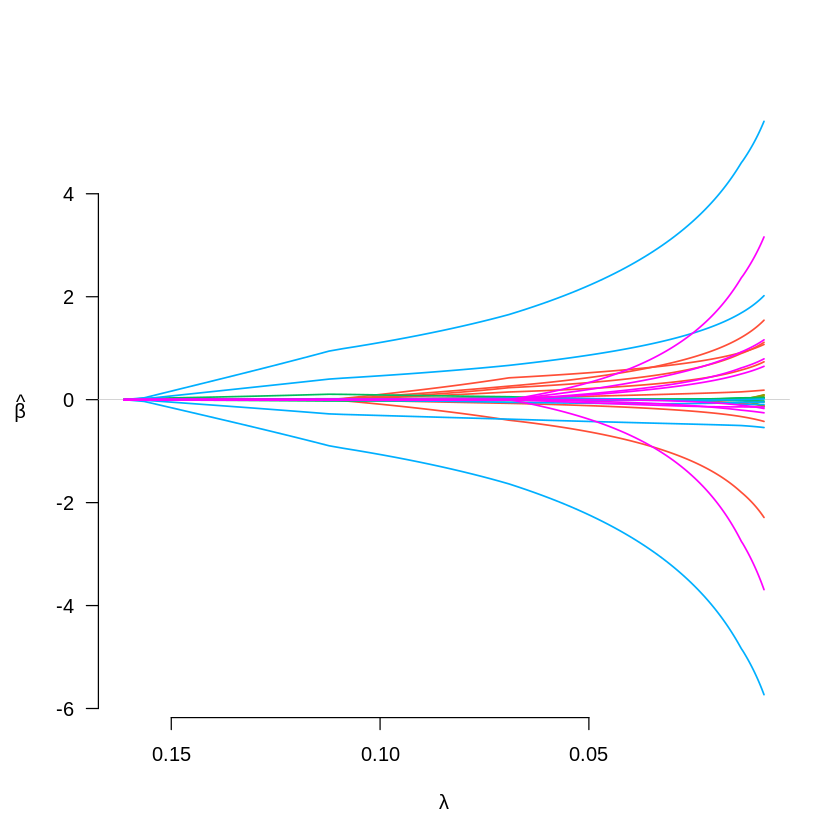

In [ ]:
#fitting model regresi logistik biner dengan Group LASSO
fit <- grpreg(X, data$Y,group,penalty="grLasso", family = "binomial")
#plot hasil fitting 
plot(fit)

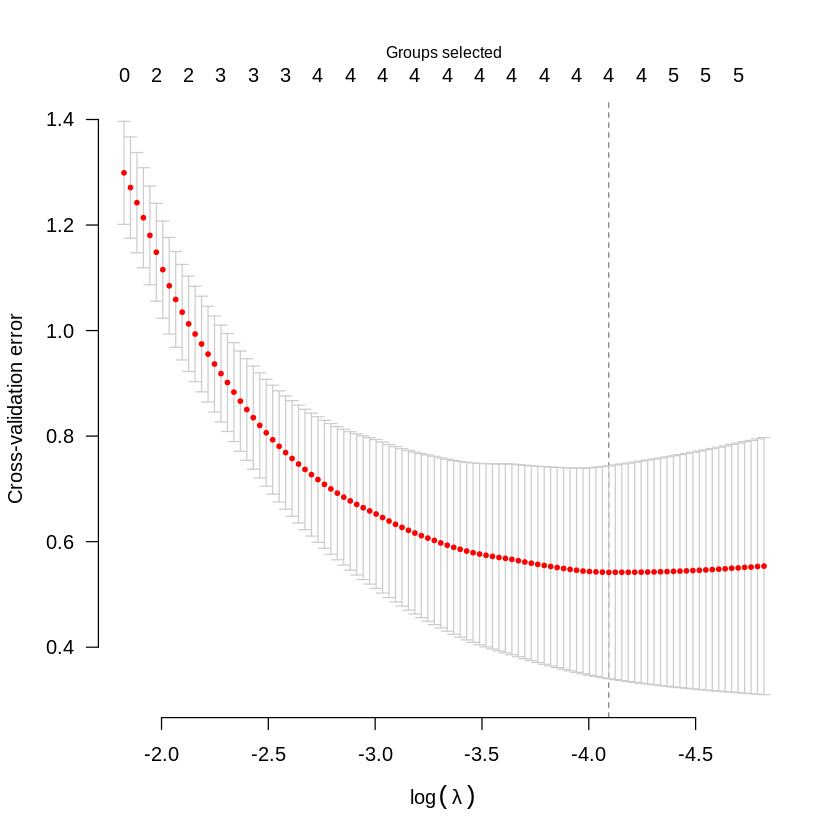

In [ ]:
#Validasi silang lipat k 
cvfit <- cv.grpreg(X, data$Y,group,penalty="grLasso", nfolds=10, family = "binomial")
plot(cvfit)

In [ ]:
summary(cvfit)

grLasso-penalized logistic regression with n=27, p=40
At minimum cross-validation error (lambda=0.0167):
-------------------------------------------------
  Nonzero coefficients: 27
  Nonzero groups: 4
  Cross-validation error of 0.54
  Maximum R-squared: 0.54
  Maximum signal-to-noise ratio: 1.43
  Prediction error at lambda.min: 0.111

In [ ]:
cbind(signif(coef(fit, cvfit$lambda.min),digits=4))

(Intercept),-0.998000
X1,0.508900
X2,-0.052690
X3,-0.292300
X4,0.141700
X5,-1.590000
X6,1.075000
X7,0.794000
X8,0.852500
X9,0.000000
X10,0.000000


In [ ]:
write.csv(cbind(signif(coef(fit, cvfit$lambda.min),digits=4)),'healthstudy2.csv')

In [ ]:
ipm_glasso <- grpreg(X, data$Y,group,penalty="grLasso", family = "binomial", lambda = cvfit$lambda.min)

In [ ]:
#ketepatan klasifikasi
glassopredik <- predict(ipm_glasso 
, X, type="response", lambda = ) > 0.5
cbind(data$Y, glassopredik)

,glassopredik
0,0
0,0
0,0
1,1
0,0
0,0
0,0
0,0
0,0
0,0


In [ ]:
table(true=data$Y,pred=glassopredik)

    pred
true FALSE TRUE
   0    17    0
   1     0   10

In [ ]:
#pendugaan standard error dengan bootstrap
bootstrap.log <- function(data,n_sub) {
n <- nrow(data)
rnd <- sample(n,n_sub,replace=TRUE)
bootstrap.log <- data[rnd,]
}
cat('proses bootstrap: ')
n_boot <- 100
tmp_coef <- NULL
for(m in 1:n_boot) {
data_boot <- bootstrap.log(data,1000)
Y <- as.matrix(data_boot[,3])
X <- as.matrix(data_boot[,4:43])
ipm_glasso <- grpreg(X, Y,group,penalty="grLasso", family = "binomial", lambda = 0.0167)
tmp_coef <-
cbind(tmp_coef,coef(ipm_glasso))
}
sqrt(var(tmp_coef["(Intercept)",]))
sqrt(var(tmp_coef["X1",]))
sqrt(var(tmp_coef["X2",]))
sqrt(var(tmp_coef["X3",]))
sqrt(var(tmp_coef["X4",]))
sqrt(var(tmp_coef["X5",]))
sqrt(var(tmp_coef["X6",]))
sqrt(var(tmp_coef["X7",]))
sqrt(var(tmp_coef["X8",]))
sqrt(var(tmp_coef["X9",]))
sqrt(var(tmp_coef["X10",]))
sqrt(var(tmp_coef["X11",]))
sqrt(var(tmp_coef["X12",]))
sqrt(var(tmp_coef["X13",]))
sqrt(var(tmp_coef["X14",]))
sqrt(var(tmp_coef["X15",]))
sqrt(var(tmp_coef["X16",]))
sqrt(var(tmp_coef["X17",]))
sqrt(var(tmp_coef["X18",]))
sqrt(var(tmp_coef["X19",]))
sqrt(var(tmp_coef["X20",]))
sqrt(var(tmp_coef["X21",]))
sqrt(var(tmp_coef["X22",]))
sqrt(var(tmp_coef["X23",]))
sqrt(var(tmp_coef["X24",]))
sqrt(var(tmp_coef["X25",]))
sqrt(var(tmp_coef["X26",]))
sqrt(var(tmp_coef["X27",]))
sqrt(var(tmp_coef["X28",]))
sqrt(var(tmp_coef["X29",]))
sqrt(var(tmp_coef["X30",]))
sqrt(var(tmp_coef["X31",]))
sqrt(var(tmp_coef["X32",]))
sqrt(var(tmp_coef["X33",]))
sqrt(var(tmp_coef["X34",]))
sqrt(var(tmp_coef["X35",]))
sqrt(var(tmp_coef["X36",]))
sqrt(var(tmp_coef["X37",]))
sqrt(var(tmp_coef["X38",]))
sqrt(var(tmp_coef["X39",]))
sqrt(var(tmp_coef["X40",]))

proses bootstrap: 

[1] 0.04102122

[1] 0.03720631

[1] 0.03511808

[1] 0.02902506

[1] 0.04084269

[1] 0.1100628

[1] 0.1114004

[1] 0.06048446

[1] 0.06258553

[1] 0.01104919

[1] 0.007556485

[1] 0.003937614

[1] 0.007844304

[1] 0.006747575

[1] 0.01184616

[1] 0.002524637

[1] 0.02352435

[1] 0.02522154

[1] 0.01081975

[1] 0.01516159

[1] 0.05309981

[1] 0.02947222

[1] 0.03925006

[1] 0.03947781

[1] 0.129401

[1] 0.1482309

[1] 0.01988922

[1] 0.1842492

[1] 0.05239873

[1] 0.04014206

[1] 0.02728403

[1] 0.05564036

[1] 0.02758674

[1] 0.1862015

[1] 0.02644356

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0